In [ ]:
#Importing pandas and mathplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 3.2 Regression Task
# Loading Datasets
df = pd.read_csv("/content/drive/MyDrive/3rd SEM/AI/Final_CourseWork/Shoe prices(Regression).csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3.2(1)
# Display rows
print("Preview Of Dataset: ")
df.head()

Preview Of Dataset: 


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [ ]:
# Display Columns
print(df.columns)

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')


In [ ]:
# Display information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [ ]:
# check for null values
print("\n Missing Values: ")
print(df.isnull().sum())



 Missing Values: 
Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64


In [ ]:
# Missising Values Handling
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    print("\nDataFrame after handling missing values:")
df.head() # Display first few rows to see the changes
print(df.isnull().sum())


DataFrame after handling missing values:

DataFrame after handling missing values:

DataFrame after handling missing values:

DataFrame after handling missing values:

DataFrame after handling missing values:

DataFrame after handling missing values:

DataFrame after handling missing values:

DataFrame after handling missing values:
Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64


In [ ]:
# Summary Statistics
print("\nSummary Statistics: ")
print(df.describe())


Summary Statistics: 
       Brand   Model     Type Gender    Size  Color Material Price (USD)
count   1006    1006     1006   1006    1006   1006     1006        1006
unique    10     239       18      2      13     82       34          33
top     Nike  Sk8-Hi  Running    Men  US 8.5  Black     Mesh     $65.00 
freq     118      39      332    535     132    178      308         121


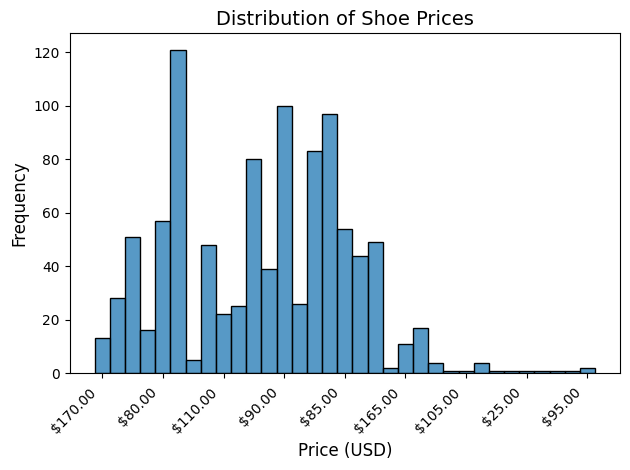

In [ ]:
# Data analysis of Shoe Price dataset.
sns.histplot(df['Price (USD)'])
plt.title('Distribution of Shoe Prices', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)  # X-axis label
plt.ylabel('Frequency', fontsize=12)  # Y-axis label

plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate, align, and set font size
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))  # Limit number of ticks

plt.tight_layout()
plt.show()


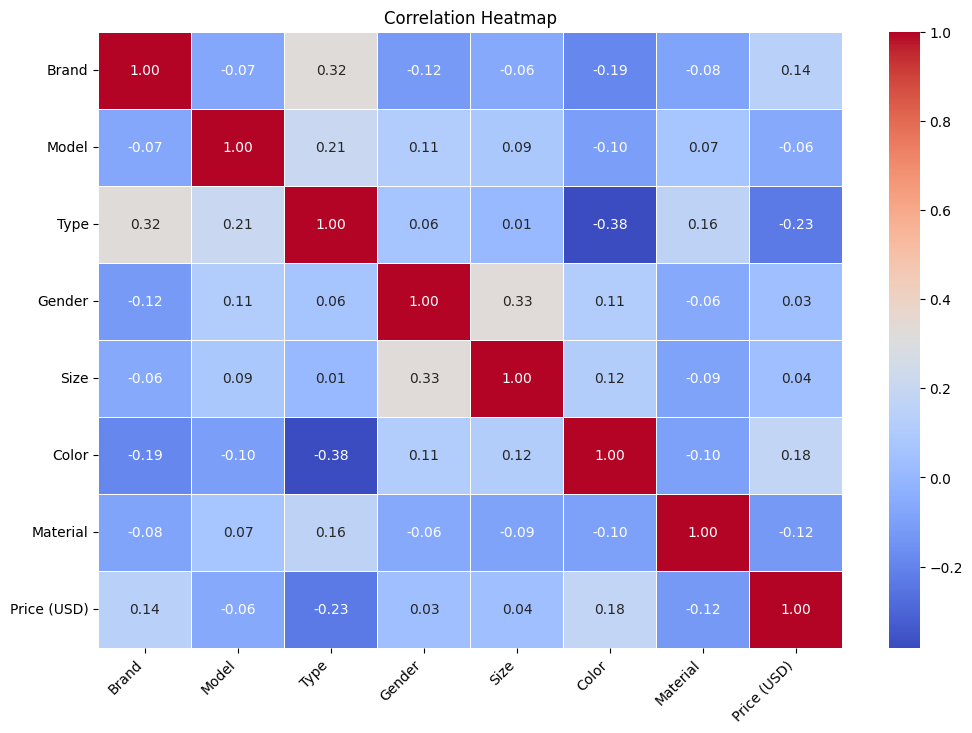

In [ ]:
# Convert categorical columns into numeric using Label Encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Duplicate Values Check
df.drop_duplicates(inplace=True)
print(df.describe())

              Brand   Model     Type Gender    Size  Color Material  \
count           925     925      925    925     925    925      925   
unique           10     239       18      2      13     82       34   
top     New Balance  NMD_R1  Running    Men  US 8.5  Black     Mesh   
freq             98      35      320    486     120    170      296   

       Price (USD)  
count          925  
unique          33  
top        $65.00   
freq           106  


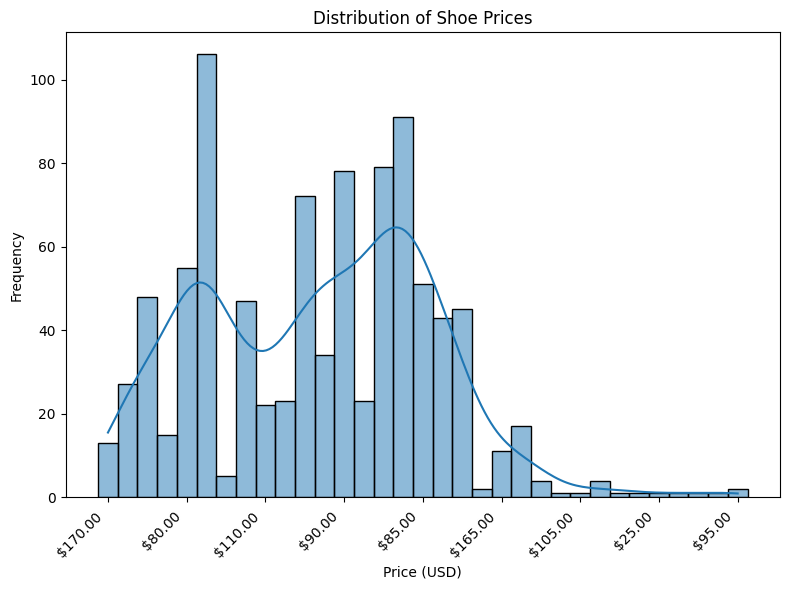

In [ ]:
# Histogram Of Shoe Prices
plt.figure(figsize=(8, 6))
figsize = (10, 6)
sns.histplot(df['Price (USD)'], bins=20, kde=True)
plt.title('Distribution of Shoe Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotated labels, adjusted alignment, increased font size
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10)) # Limit to a reasonable number of ticks

plt.tight_layout()
plt.show()

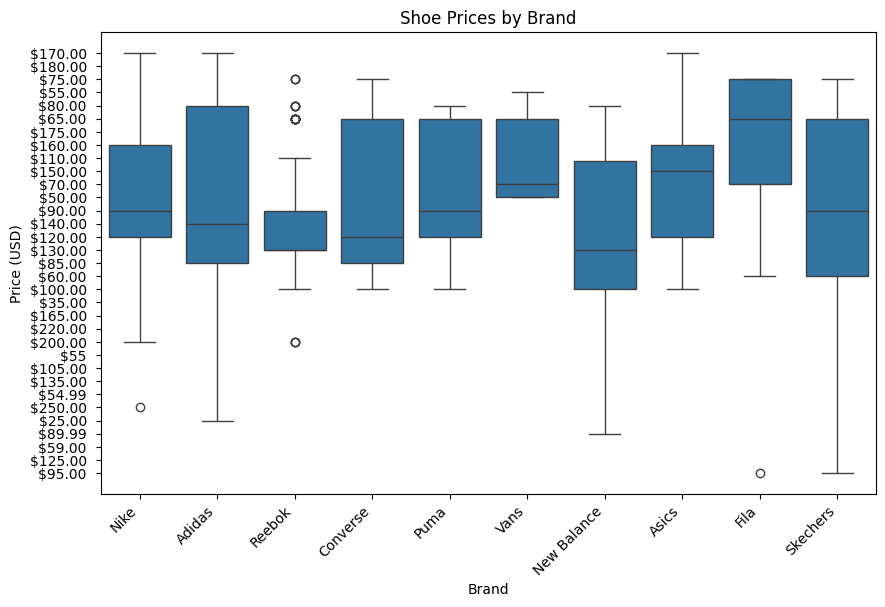

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price (USD)', data=df)
plt.title('Shoe Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Define features and target
X = df.drop(columns=['Price (USD)'])  # Assuming 'Price' is the target variable
y = df['Price (USD)']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ensure 'Price (USD)' is numeric (remove '$' and convert to float)
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace("$", "", regex=False).astype(float)

# Fix 'Size' column (remove 'US ' and convert to float)
df['Size'] = df['Size'].astype(str).str.replace("US ", "", regex=False).astype(float)

# Encode categorical columns using Label Encoding
df_encoded = df.copy()
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed later

In [ ]:
# Define features and target
X = df_encoded.drop(columns=['Price (USD)'])  # Drop target variable
y = df_encoded['Price (USD)']  # Target variable

In [ ]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [ ]:
# Print model details
print("Model trained successfully!\n")
print("Intercept:", lr_model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef}")

Model trained successfully!

Intercept: 75.25368258433895
Coefficients:
Brand: -7.036487272376102
Model: 0.020903867410373644
Type: 2.303977676939676
Gender: 0.7366482505744598
Size: 3.903673849320135
Color: -0.14615156819704894
Material: 0.6616412937453382


In [ ]:
# Encode categorical columns (handle unseen labels safely)
label_encoders = {}
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train[col])

    # Handle unseen labels in X_test
    X_test_encoded[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Make predictions safely
y_pred_lr = lr_model.predict(X_test_encoded)

# Print first few predictions
print("Predictions:", y_pred_lr[:10])


Predictions: [ 78.07122516  89.46240489 107.71410304  83.27081993 143.32195406
  93.32081884 102.39093962 133.92766748 100.87195706  58.1970885 ]


In [ ]:
# Convert target variable (y_test) to numeric
y_test_numeric = y_test.str.replace("$", "", regex=False).astype(float)

# Evaluate Linear Regression Model
mse_lr = mean_squared_error(y_test_numeric, y_pred_lr)
r2_lr = r2_score(y_test_numeric, y_pred_lr)

print("\nLinear Regression Model Performance:")
print(f'Mean Squared Error: {mse_lr:.4f}')
print(f'R-Squared: {r2_lr:.4f}')


Linear Regression Model Performance:
Mean Squared Error: 1425.3127
R-Squared: 0.1241


In [ ]:
# Ensure 'Size' column is numeric
X_train['Size'] = X_train['Size'].astype(str).str.replace("US ", "", regex=False).astype(float)
X_test['Size'] = X_test['Size'].astype(str).str.replace("US ", "", regex=False).astype(float)

# One-hot encode categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)

# Convert target variable to numeric
y_train_numeric = y_train.str.replace("$", "", regex=False).astype(float)

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train_numeric)


DecisionTreeRegressor(random_state=42)

**Prediction Part**

In [ ]:
# Prepare the features (X) and target (y)
X = df[['Size', 'Model']]  # Include 'Model' column
y = df['Price (USD)']

# One-hot encode the 'Model' column
X = pd.get_dummies(X, columns=['Model'], drop_first=True)

In [ ]:
# Debug: Print columns in X_train
print("Columns in X_train:", X_train.columns)

# Separate numerical and categorical columns
numerical_cols = ['Size']  # Numerical column
categorical_cols = X_train.columns.difference(numerical_cols).tolist()  # All one-hot encoded 'Model' columns

Columns in X_train: Index(['Size', 'Brand_Asics', 'Brand_Converse', 'Brand_Fila',
       'Brand_New Balance', 'Brand_Nike', 'Brand_Puma', 'Brand_Reebok',
       'Brand_Skechers', 'Brand_Vans',
       ...
       'Material_Suede/Leather', 'Material_Suede/Mesh', 'Material_Suede/Nylon',
       'Material_Suede/Textile', 'Material_Synthetic',
       'Material_Synthetic/Leather', 'Material_Synthetic/Mesh',
       'Material_Synthetic/Textile', 'Material_Textile',
       'Material_Textile/Leather'],
      dtype='object', length=354)


In [ ]:
# Initialize the OneHotEncoder for categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns in the training data
encoder.fit(X_train[categorical_cols])

# Transform the categorical columns in both training and test data
X_train_cat_encoded = encoder.transform(X_train[categorical_cols])
# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(categorical_cols)

# Transform the categorical columns in the test data, handling unknown categories
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test.reindex(columns=categorical_cols, fill_value='Unknown')[categorical_cols]),
                                  columns=feature_names,
                                  index=X_test.index)

In [ ]:
# Convert encoded categorical data to DataFrames
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Combine numerical and encoded categorical columns
X_train_encoded = pd.concat([X_train[numerical_cols], X_train_cat_encoded], axis=1)
X_test_encoded = pd.concat([X_test[numerical_cols], X_test_cat_encoded], axis=1)


In [ ]:
# Ensure test set has the same columns as the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [ ]:
# Build and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
# Convert y_train to numeric before fitting
y_train_numeric = y_train.str.replace("$", "", regex=False).astype(float)
dt_model.fit(X_train_encoded, y_train_numeric)  # Fit using encoded training data and numeric target

DecisionTreeRegressor(random_state=42)

In [ ]:

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_encoded, y_train_numeric)


# Make predictions
# Ensure 'Size' is numeric in X_test_encoded before prediction
X_test_encoded['Size'] = pd.to_numeric(X_test_encoded['Size'], errors='coerce').fillna(0)
y_pred_dt = dt_model.predict(X_test_encoded)



In [ ]:
# Evaluate Decision Tree Model
# Convert y_test to numeric before evaluation
y_test_numeric = y_test.str.replace("$", "", regex=False).astype(float)
mse_dt = mean_squared_error(y_test_numeric, y_pred_dt)
r2_dt = r2_score(y_test_numeric, y_pred_dt)
print("\nDecision Tree Regression Model Performance:")
print(f'Mean Squared Error: {mse_dt:.4f}')
print(f'R-Squared: {r2_dt:.4f}')


Decision Tree Regression Model Performance:
Mean Squared Error: 1780.5405
R-Squared: -0.0942


In [ ]:
# Comparison of Model
best_model = 'Linear Regression' if r2_lr > r2_dt else 'Decision Tree'
print(f"\nBest Model: {best_model}")


Best Model: Linear Regression


In [ ]:
# Hyperparameter tuning for Decision Tree
grid_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), grid_params, cv=5, scoring='r2')

# Convert y_train to numeric before fitting
y_train_numeric = y_train.str.replace("$", "", regex=False).astype(float) # Convert y_train to numeric
grid_search.fit(X_train, y_train_numeric) # Use numeric y_train for fitting
print("\nBest Hyperparameters for Decision Tree:")
print(grid_search.best_params_)


Best Hyperparameters for Decision Tree:
{'max_depth': None, 'min_samples_split': 10}


In [ ]:
# Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')

# Convert y_train to numeric before fitting
y_train_numeric = pd.to_numeric(y_train.str.replace("$", "", regex=False))
selector.fit(X_train, y_train_numeric)

# Use X_train.columns instead of X.columns
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Importance Ranking:")
print(feature_scores)


Feature Importance Ranking:
                Feature       Score
238        Type_Running  234.343509
340  Material_Primeknit  171.467999
9            Brand_Vans  102.676599
239          Type_Skate   88.443503
230         Type_Casual   76.790551
..                  ...         ...
294      Color_Navy/Red    0.003477
87    Model_Free RN 5.0    0.003477
283   Color_Grey/Orange    0.000872
260   Color_Blue/Orange    0.000063
281    Color_Grey/Black    0.000031

[354 rows x 2 columns]


In [ ]:
# Final Model using the Best Model and Selected Features
final_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)

# Convert y_train to numeric before fitting
y_train_numeric = y_train.str.replace("$", "", regex=False).astype(float)
final_model.fit(X_train, y_train_numeric) # Fit using the numeric target variable

# Apply the same preprocessing to X_test that was applied to X_train
# Assuming X_train was one-hot encoded:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure X_test_encoded has the same columns as X_train
X_test_encoded = X_test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Now make predictions using the preprocessed X_test_encoded
y_pred_final = final_model.predict(X_test_encoded)

In [ ]:
# Evaluate Final Model
# Convert y_test to numeric before evaluation
y_test_numeric = y_test.str.replace("$", "", regex=False).astype(float)  # Convert y_test to numeric
mse_final = mean_squared_error(y_test_numeric, y_pred_final)  # Use numeric y_test
r2_final = r2_score(y_test_numeric, y_pred_final)  # Use numeric y_test
print("\nFinal Model Performance:")
print(f'Mean Squared Error: {mse_final:.4f}')
print(f'R-Squared: {r2_final:.4f}')


Final Model Performance:
Mean Squared Error: 245.0675
R-Squared: 0.8494
